In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Add_sales_data_2018_196878ab3819eaeabd58e612017e53c6.csv")
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [3]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [6]:
df.shape

(205, 7)

#### The data has no null values. 
#### The data has 205 rows and 7 columns

### 1. Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.  

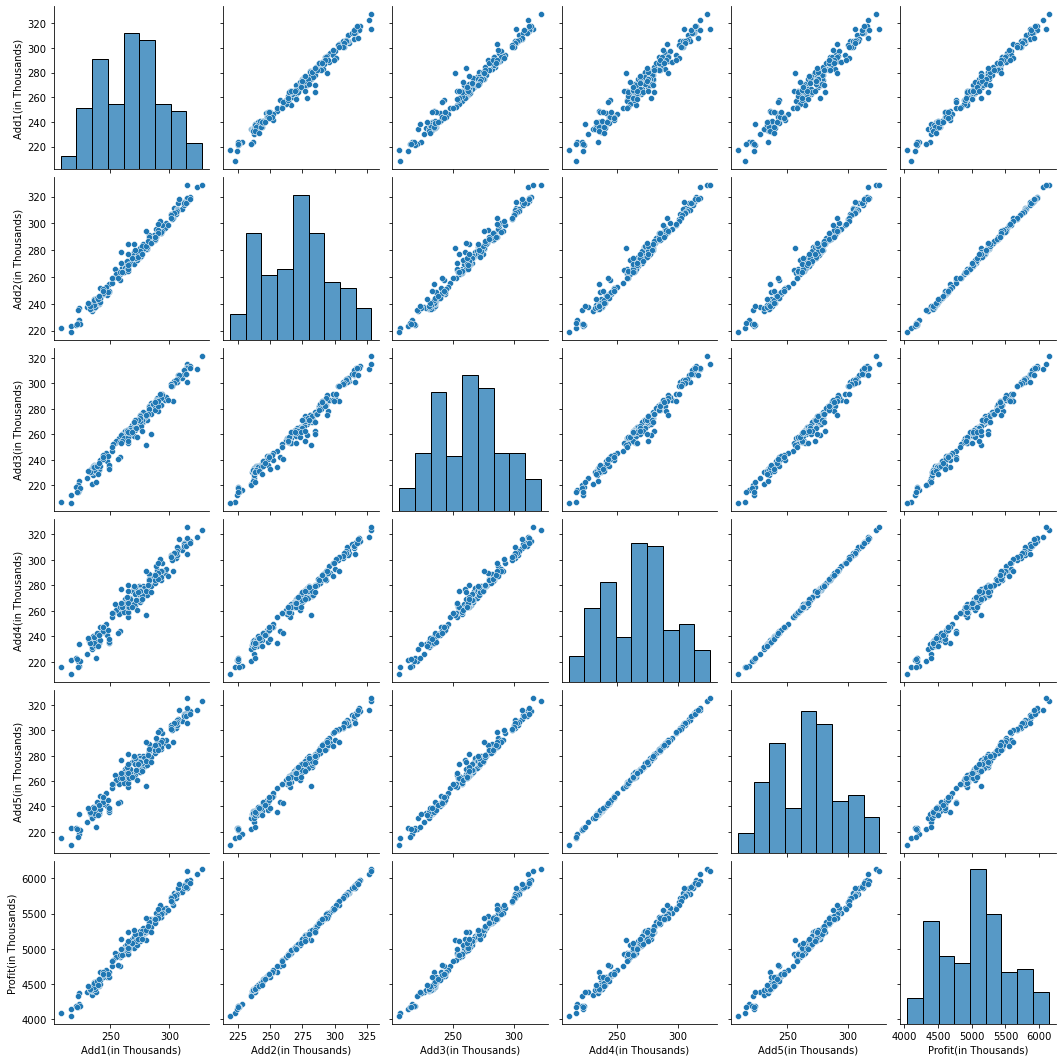

In [7]:
sns.pairplot(df)
plt.show()

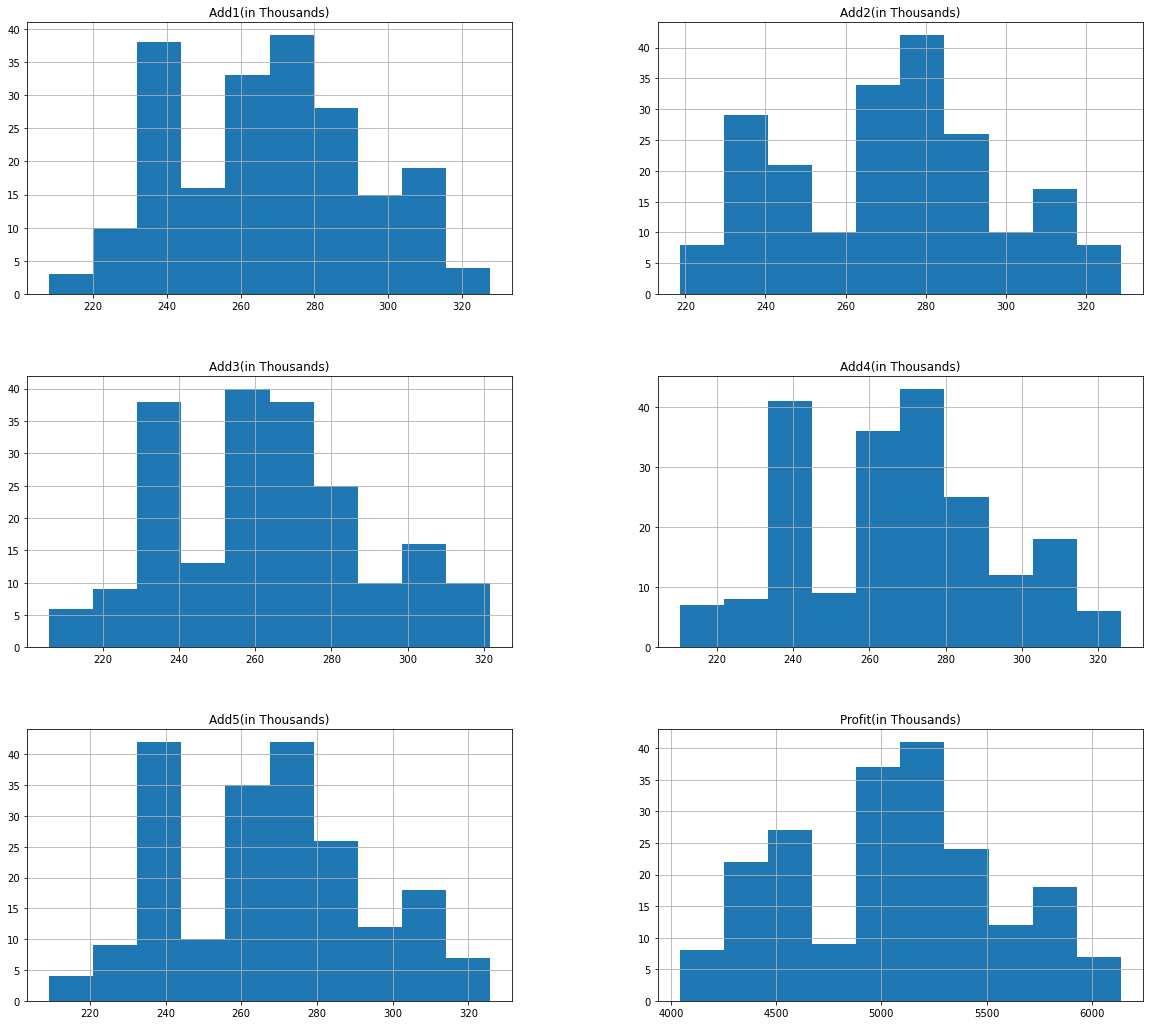

In [8]:
freqgraph=df.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,18))
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Add1(in Thousands)'),
  Text(1.5, 0, 'Add2(in Thousands)'),
  Text(2.5, 0, 'Add3(in Thousands)'),
  Text(3.5, 0, 'Add4(in Thousands)'),
  Text(4.5, 0, 'Add5(in Thousands)'),
  Text(5.5, 0, 'Profit(in Thousands)')])

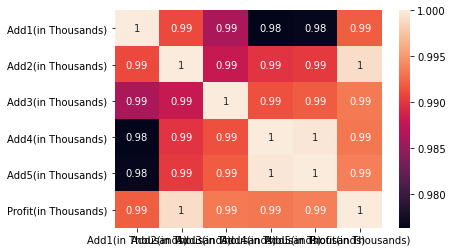

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=360)

#### Insights
- **There is high positive correlation between the features.**
- **The Add2, Add4 and Add5 have correlation approximately equal to 1.**
- **The value of profit increases as the  value of amount spent for advertising increases.**

### 2. Build a regression model to predict the profit from the given data and comment your findings on it. 

<AxesSubplot:>

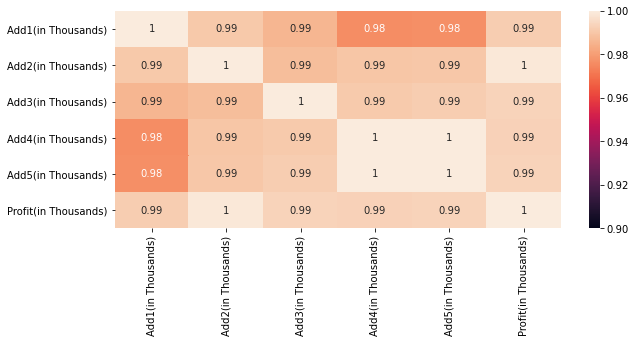

In [10]:
corrmtarix=df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmtarix, vmin=0.9, vmax=1, annot=True)

- **All the features have high correlation between them.**
- **corr(Add4,Add5)=0.98**

In [12]:
#drop the features Add4 for creating the model.
df1=df.drop(['Date','Add4(in Thousands)',],axis=1)

In [13]:
y=df1['Profit(in Thousands)']
X=df1.drop(['Profit(in Thousands)'],axis=1)

In [14]:
X.shape

(205, 4)

In [15]:
X.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,215.15
1,217.00,218.60,205.90,209.20
2,223.50,227.80,216.15,218.20
3,230.00,237.50,225.75,227.60
4,234.55,234.60,221.05,230.90


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1,test_size=0.25)                              

In [17]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [18]:
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [19]:
print(y_test)

78     5057.155
97     4648.834
151    5146.949
44     4648.627
40     4486.996
67     5001.615
98     4569.293
18     4190.965
152    5065.652
62     5234.487
4      4350.683
172    5789.791
197    5616.186
38     4486.380
29     4482.183
170    5728.804
190    5917.925
33     4513.600
136    4915.682
145    5108.626
173    5805.521
31     4617.695
11     4435.571
119    5227.886
169    5730.999
34     4461.325
84     4925.861
184    5962.336
120    5182.368
35     4419.421
163    5267.657
28     4416.136
16     4175.677
130    4922.845
116    5395.217
182    5956.323
27     4453.773
47     4519.061
58     5133.766
204    5421.842
138    5247.011
106    5430.790
90     4887.296
147    5175.051
185    5903.253
95     4623.793
73     4936.120
51     4477.226
117    5359.346
103    5498.553
69     5030.451
107    5452.280
Name: Profit(in Thousands), dtype: float64


In [20]:
print(predictions)

[5056.81691292 4648.82942865 5145.68237893 4648.43029689 4486.50335881
 5000.45589593 4568.94444736 4190.73163564 5065.24931043 5233.87406928
 4351.63272012 5790.33048318 5616.28853229 4486.27659944 4482.16171737
 5729.35668716 5918.49220762 4512.51080559 4914.589303   5108.7147167
 5805.20999744 4618.09106276 4435.82015671 5228.26210652 5731.06333396
 4461.40738478 4925.5074947  5962.65451522 5182.22660195 4418.69280583
 5268.20166403 4415.52593754 4175.21458108 4922.39702936 5395.91617688
 5956.19453841 4453.99682028 4518.59798673 5133.64634624 5422.33419744
 5246.88695924 5430.82335187 4887.25875172 5174.25045212 5903.42490893
 4623.30096325 4936.5315904  4476.90099406 5358.17321462 5498.58739519
 5033.21699904 5452.66228583]


In [21]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.423477654665089


In [22]:
model.intercept_

-0.49479742656512826

In [23]:
model.coef_

array([ 1.02826933, 12.35607553,  3.45625373,  1.94112924])

- **The regression model is built with MSE=0.423.**
- **The model intercept is -0.4947.**
- **The y_test and predictions have been printed.**
- **Since the value of MSE is small, the model is accurate.**

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 
 
#### Add1(in Thousands)- 290 
#### Add2(in Thousands)- 312 
#### Add3(in Thousands)- 309 
#### Add4(in Thousands)- 298 
#### Add5(in Thousands)- 320 
 

In [24]:
make_pred=[[290,312,309,320]]
model.predict(make_pred).item()

5841.942630641751

#### The predicted profit for the given values of amount spend for advertisements is 5841.942.